# DSP Lecture Notes 3: Signals
$\text{2023 D.J. Lopez | Digital Signals Processing }$

In [46]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Signal Generation

Generating signals is a fundamental technique in Digital Signals Processing. In this notebook, we will explore how signals are modeled and generated using different methods in Python. We'll get to know different plots and characteristics as well using different `matplotlib` plots.

### 1.1 Signals as Functions

Signal generation can be done depending on how a signal is perceived. If it is perceived as a **function** then we need to model or obtain a function that would best represent the characteristic of the signal. Say for example:

$$f(t) = \left\{ \begin{matrix} 1 + x^2 & x>0 \\ 1 & \text{otherwise}\end{matrix} \right. $$

However, the fundamental pieces of generating signals using vectors include the function, the input, and the output. We can model this using Python functions. Say for example we want to plot this function:

$$f(t) = \text{exp}\begin{bmatrix}-\frac{t}{2}\end{bmatrix} = e^{-\frac{t}{2}}$$

In [50]:
def f(t):
    y = np.exp(-t/2) ## this defines the function or the model
    return y ## this pertains to the output

We need now to determine the input range or domain. We can use either `np.arange` or `np.linspace`. We immediately plot it to see the difference.

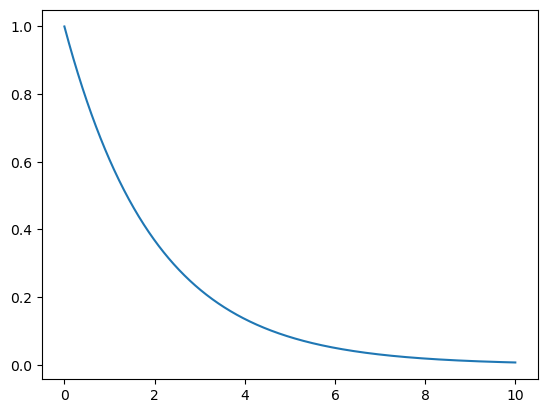

In [52]:
# X = np.arange(0,10.001,0.001) ## this means start with 0 and end with 10 with 0.001 steps
X = np.linspace(0,10,1000) ## this means start with 0 and end with 10 with 1000 points in between
plt.plot(X, f(X))
plt.show()

### 1.2 Signals as Vectors
Perceiving the signal as a function is most commonly done in analog signal analysis. Digital signal analysis would assume that an analog signal is discretely sampled. We can then safely assume that for discrete timesteps or samples, the signals' amplitudes are clearly defined, so we can model them as **vectors**.

If we would dissect the outputs of the functions made in Python we could actually observe that they are all vectors as well. However, we can still plot signals without having a function. Say for example:
$$T = \begin{pmatrix} 0 & 1 &2 &3 &4 &5 &6 &7 &8\end{pmatrix}$$
$$Y = \begin{pmatrix} 0 & 0.001 & 0.01 & 0.1 & 1 & 10 & 100 & 1000\end{pmatrix}$$
We can then plot it with $T$ as the domain or input and $Y$ as the output. But the question will remain that what system produced $Y$ given $T$ as an input?

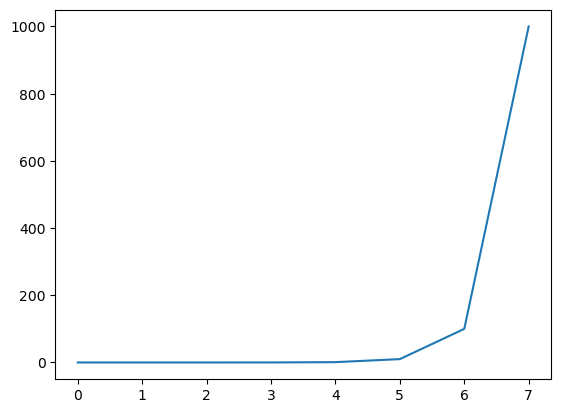

In [61]:
T = np.arange(0,8)
Y = np.array([0, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3])
plt.plot(T,Y)
plt.show()

You might notice that the signal is not as smooth as the one generated using a function. This is actually a case of **aliasing**. Aliasing is a sampling effect wherein there are too few samples to represent the true signal. The sample of the signal generated by the function is higher (specifically 1000) than the one generated using purely vectors. Now this is not a matter of whether to use a function or a vector to generate signals but rather how many values can we get in between the discrete steps.

## 2. Sampling

Sampling is a technique in DSP wherein we do not take all the values of continuous signals when we analyze or store them. We would tend to get only values or measurements of an analog or continuous signal at discrete timesteps or **samples** to get a good enough representation of a signal. Let's make use of the $sin()$ function to demonstrate sampling.

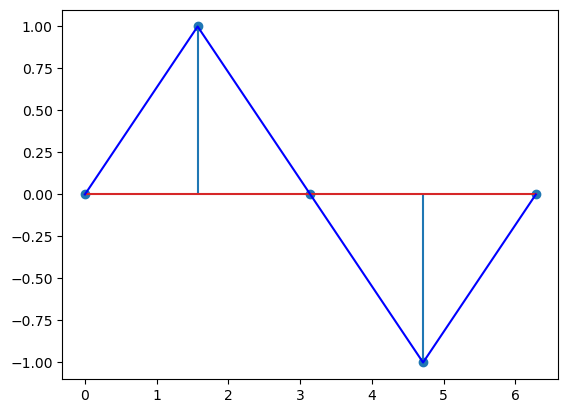

In [74]:
f = np.sin
N_low = np.linspace(0, 2*np.pi, 5) ## sampling rate of 1/5 or total of 5 samples

plt.stem(N_low, f(N_low))
plt.plot(N_low, f(N_low), color='blue')

plt.show()

Now this signal does not look like a sine wave at all. This is another example of aliasing when we tend to under sample a certain signal. We might get the wrong idea of what the true signal is when we have too few measurements, information is lost at this point.

What if we try to get as much as samples as we want? We can try to increase the sampling rate at `np.linspace`

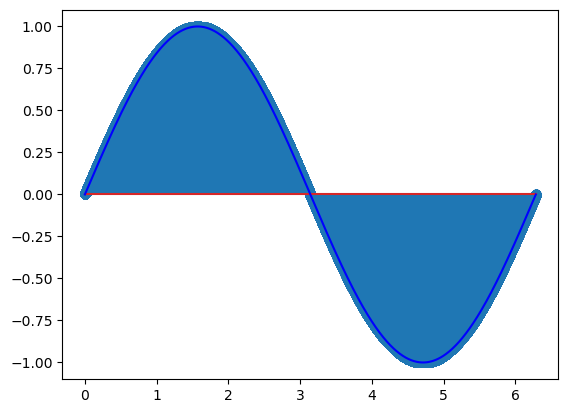

In [75]:
N_high = np.linspace(0, 2*np.pi, int(1e6)) ## sampling rate of 1/1M or total of 1 milllion samples

plt.stem(N_high, f(N_high))
plt.plot(N_high, f(N_high), color='blue')

plt.show()

Now our signal is really smooth but the discrete samples are too much that we can't see the graph. You might also notice that it took quite some time before the graph was plotted. This is now a case of oversampling. Too much memory or computational complexity is needed if we have more data even if we have a simple signal to work on. A solution to this is downsampling.

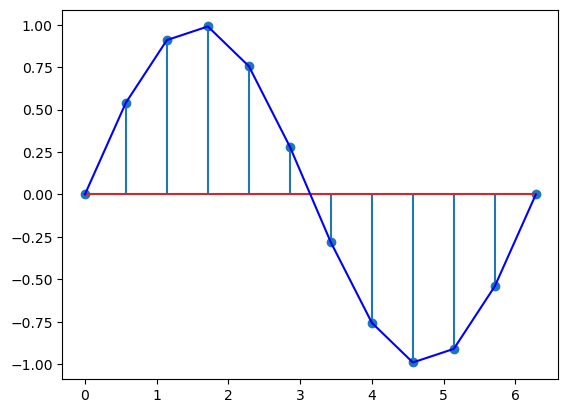

In [85]:
N = np.linspace(0, 2*np.pi, int(4*np.pi)) ## sampling rate of 1/2(2pi) or total of 12 samples

plt.stem(N, f(N))
plt.plot(N, f(N), color='blue')

plt.show()

The right sampling is to take the Nyquist-Shannon Sampling theorem wherein it states that that an analog signal can be digitized without aliasing error if and only if the sampling rate is greater than or equal to twice the highest frequency component in a given signal. The Nyquist sampling can be obtained as:
$$f_{\text{Nyquist}} = \frac{1}{2B}$$
Whereas $B$ is the bandlimit or the maximum limit of the signal. However, another way is to find the least number of samples when reconstructing a signal and getting which reconstruction has the least error (we'll get to know this in the next weeks).

## 3. Aperiodic Signals

Now we will get to know several fundamental signals in DSP. They are mainly divided as Aperiodic and Periodic Signals. Aperiodic signals, by its name, has no periods or it does not repeat any patterns.

### 3.1 Impulse Signal
The impulse signal or the ideal dirac-delta signal is a function defined at:
$$\delta(t) = \left\{ \begin{matrix} 1 & x=0 \\ 0 & \text{otherwise}\end{matrix} \right. $$
We can model and plot it as:

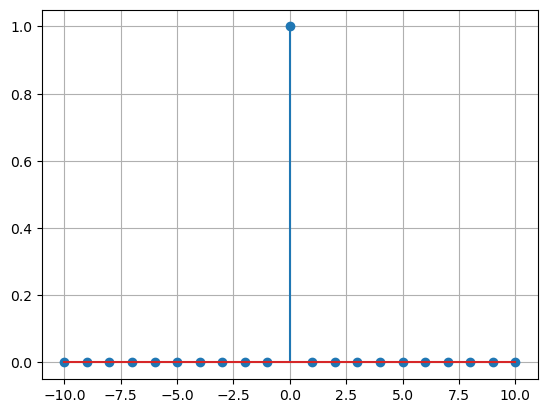

In [91]:
N = np.linspace(-10,10, 21)

def impulse(N):
    return np.where(N == 0, 1, 0)

plt.stem(N, impulse(N))
plt.grid()
plt.show()

### 3.2 Ramp Signal
The ramp signal is also the linear signal wherein it is defined as first degree linear combination:
$$\text{ramp}(t) = mt + b$$
Where $m$ and $b$ are some constants that correspond to the slope and y-intercept/ DC-component respectively.

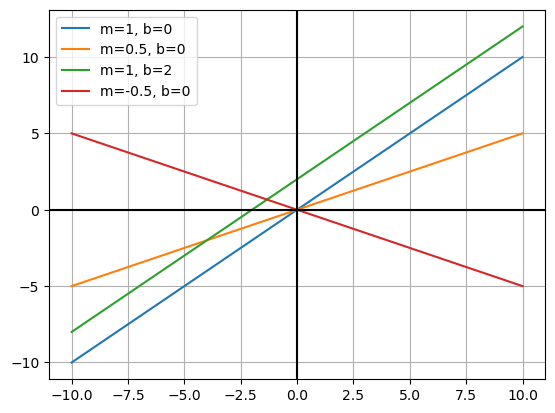

In [103]:
def ramp(t,m,b):
    return m*t + b

plt.plot(N,ramp(N, 1, 0), label='m=1, b=0')
plt.plot(N,ramp(N, 0.5, 0), label='m=0.5, b=0')
plt.plot(N,ramp(N, 1, 2), label='m=1, b=2')
plt.plot(N,ramp(N, -0.5, 0), label='m=-0.5, b=0')

plt.axhline(color='k')
plt.axvline(color='k')

plt.legend()
plt.grid()
plt.show()

### 3.3 Exponential Signal
Exponential signals are transcendental aperiodic signals wherein it exponentially increases by some base. 

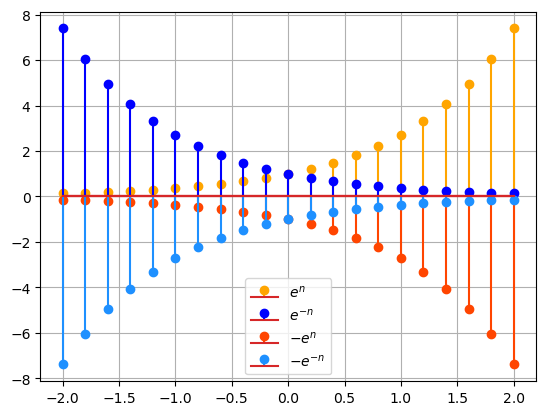

In [153]:
N = np.linspace(-2,2, 21)
plt.stem(N,np.exp(N), linefmt='orange', label=r'$e^n$')
plt.stem(N,np.exp(-N), linefmt='blue', label=r'$e^{-n}$')
plt.stem(N,-np.exp(N), linefmt='orangered', label=r'$-e^{n}$')
plt.stem(N,-np.exp(-N), linefmt='dodgerblue', label=r'$-e^{-n}$')

plt.grid()
plt.legend()
plt.show()

## 3. Periodic Signals
Periodic signals unlike aperiodic signals would have periodicity— a signal property that means there are recurring temporal patterns in the signal. A common example to this is the sine function which oscillates at a given **period** 

### 3.1 Unit Signal
The unit or step signal pertains to a constant line or the DC component of the signal. It is a periodic signal which is defined as:
$$u(t) = \left\{ \begin{matrix} 1 & x\geq0 \\ 0 & \text{otherwise}\end{matrix} \right. $$
However, you might think that this is not a periodic signal since it is just a straight line. As it is a straight line it means it has a near-infinite period in the analog sense. In the digital sense, the period of the unit signal is equal to its sampling rate. 

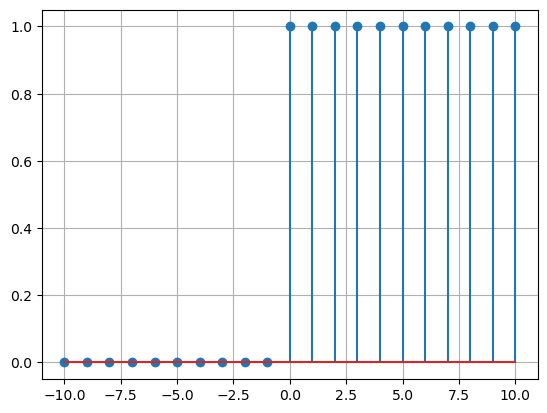

In [155]:
N = np.linspace(-10,10, 21)

def step(N):
    return np.where(N >= 0, 1, 0)

plt.stem(N, step(N))

plt.grid()
plt.show()

### 3.2 Sinusoidal Signals

Sinusoidal signals pertain to the family of sines and cosines. These signals oscillate a given frequency $f$. The intensity of the sinusoids are based on their amplitude $A$. The phase shift of a sinusoidal signal is given as $\phi$. We can then combine these concepts in the high-school definition of sinusoids:
$$A\sin(f\theta + \phi)$$

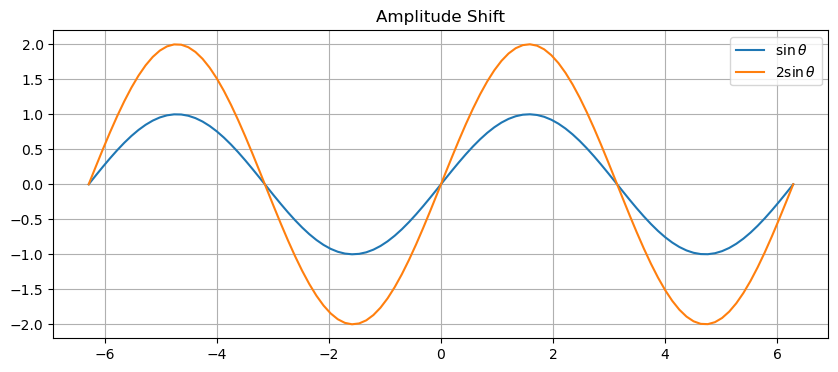

In [171]:
N = np.linspace(-2*np.pi, 2*np.pi, 100)

plt.figure(figsize=(10,4))
plt.title('Amplitude Shift')
plt.plot(N,np.sin(N), label=r'$\sin \theta$')
plt.plot(N,2*np.sin(N), label=r'$2\sin \theta$')


plt.legend()
plt.grid()
plt.show()

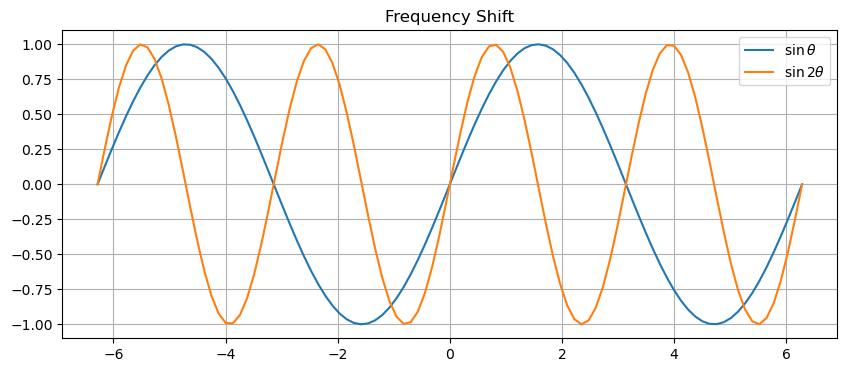

In [170]:
plt.figure(figsize=(10,4))
plt.title('Frequency Shift')
plt.plot(N,np.sin(N), label=r'$\sin \theta$')
plt.plot(N,np.sin(2*N), label=r'$\sin 2\theta$')

plt.legend()
plt.grid()
plt.show()

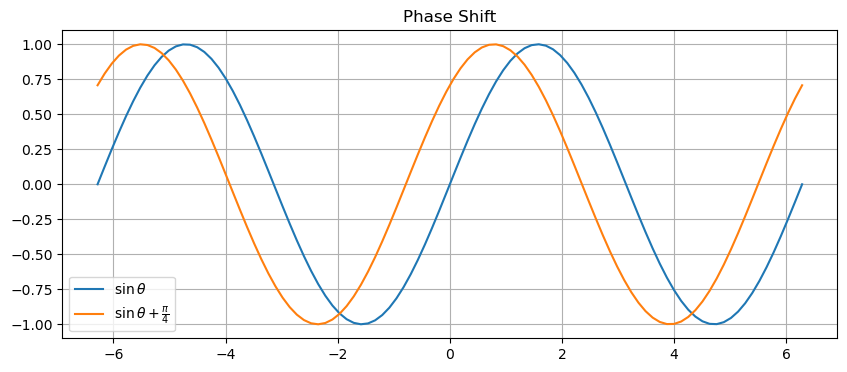

In [178]:
plt.figure(figsize=(10,4))
plt.title('Phase Shift')
plt.plot(N,np.sin(N), label=r'$\sin \theta$')
plt.plot(N,np.sin(N+np.pi/4), label=r'$\sin \theta + \frac{\pi}{4}$')

plt.legend()
plt.grid()
plt.show()


## 4. Euler's Formula and Identity

In signal processing, waves can be represented as complex numbers as well. We can represent a general formula for sinusoids using this way. This is well represented using Euler's formula:
$$e^{-i\theta} = \cos{\theta} + i \sin{\theta}$$

In [179]:
def euler(theta):
    return np.exp(1j*theta)

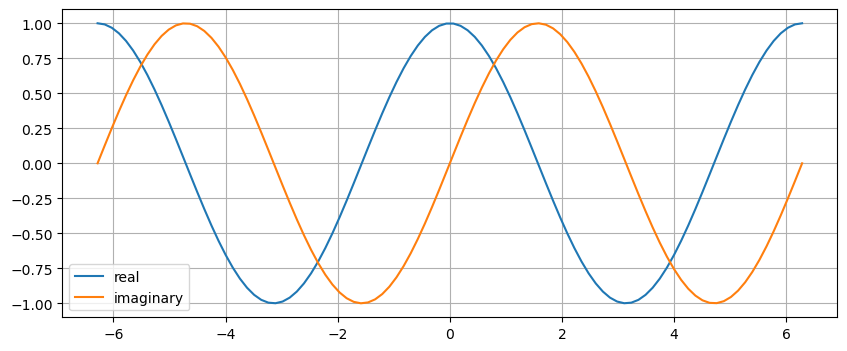

In [189]:
N = np.linspace(-2*np.pi,2*np.pi,100)

plt.figure(figsize=(10,4))

plt.plot(N, euler(N).real, label='real')
plt.plot(N, euler(N).imag, label='imaginary')

plt.legend()
plt.grid()
plt.show()